# Transformações dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import import_ipynb
import services.lista_estados_regioes as ler
import services.visualization as view

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [3]:
dataset = pd.read_csv('dados/dataset_poscomp.csv')

In [4]:
dataset.describe()

,IDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,Lógica Matemática,Organização de Arquivos e Dados,Técnicas de Programação,...,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO
count,13477.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,...,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,13477.000000
mean,32.408845,1.228387,1.104127,1.298807,1.025781,1.203152,0.830281,1.329416,0.762321,2.196411,...,0.925116,1.197048,0.505876,1.125171,1.073791,1.771796,0.570648,0.724697,0.913364,2017.338428
std,6.153180,0.826980,0.827616,0.967677,0.897930,0.891273,0.692842,0.881501,0.760549,0.717629,...,0.784115,0.825455,0.606382,0.751457,0.894806,0.898115,0.635406,0.668973,0.777005,1.095114
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,28.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000
50%,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2017.000000
75%,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2018.000000
max,72.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2019.000000


## Adicionar os eixos e somar de cada candidato

In [5]:
dataset['matematica'] = dataset.loc[:,['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear',
 'Geometria Analítica', 'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática']].sum(axis=1)

In [6]:
dataset['fund_computacao'] = dataset.loc[:,['Organização de Arquivos e Dados','Técnicas de Programação',
 'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais', 'Arquitetura e Organização de Computadores']].sum(axis=1)

In [7]:
dataset['tec_computacao'] = dataset.loc[:,['Redes de Computadores', 'Computação Gráfica',
                                                   'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos',
                                                   'Compiladores', 'Processamento de Imagens', 'Banco de Dados']].sum(axis=1)

In [8]:
dataset['total'] = dataset['matematica'] + dataset['fund_computacao'] + dataset['tec_computacao']

In [9]:
dataset=dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dataset['ANO'].value_counts()

2016    3916
2017    3740
2018    3165
2019    2656
Name: ANO, dtype: int64

In [10]:
cargo = {'1-Mestrado/Doutorado': '1', '2-Autoavaliação': '2'}
dataset = dataset.replace({'CARGO': cargo}, {'ESTADO': ler.estados_n})
dataset = dataset.rename(columns={'PRESENTE DIA1': 'PRESENTE'})

In [11]:
dataset['ESTADO'] = dataset['ESTADO'].replace(ler.estados_n)
dataset['SEXO'] = dataset['SEXO'].replace(['M','F'],[1,0])
dataset['CARGO'] = dataset['CARGO'].replace(['Mestrado/Doutorado','Autoavaliação'],[0,1])
dataset['REGIAO'] = dataset['REGIAO'].replace(ler.siglas_n)

In [12]:
# dataset = dataset.drop(dataset[dataset['ESPECIALIDADE'] == 'outras áreas'].index)
# dataset = dataset.drop(dataset[dataset['PRESENTE'] == 'N'].index)

In [13]:
# dataset = dataset.drop(['PRESENTE','CARGO'], axis=1)

In [14]:
# frame = dataset[dataset['PRESENTE DIA1'] == 'S' && dataset[dataset['CARGO'] == '0']]
# frame = dataset.query('PRESENTE == "S" and CARGO==0')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13477 entries, 0 to 13476
Data columns (total 39 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        13477 non-null  object 
 1   SEXO                                             13477 non-null  int64  
 2   ESTADO                                           13477 non-null  int64  
 3   REGIAO                                           13477 non-null  int64  
 4   IDADE                                            13477 non-null  int64  
 5   ESPECIALIDADE                                    13477 non-null  object 
 6   PRESENTE                                         13477 non-null  object 
 7   CARGO                                            13477 non-null  int64  
 8   Matemática Discreta                              10977 non-null  float64
 9   Cálculo Diferencial e Integr

In [15]:
dados_poscomp = dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dados_poscomp = dados_poscomp.set_index('INSCRICAO')
dados_poscomp

,SEXO,ESTADO,REGIAO,IDADE,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,area_concentration,matematica,fund_computacao,tec_computacao,total
INSCRICAO,,,,,,,,,,,,,,,,,,,,,
39401645886-1,1,5,1,33,sistemas de computação,S,0,3.0,3.0,2.0,...,2.0,1.0,1.0,1.0,2016,fundamentos da computacao,14.0,21.0,10.0,45.0
39401663587-8,1,20,4,28,sistemas de computação,S,0,3.0,2.0,3.0,...,3.0,1.0,2.0,1.0,2016,fundamentos da computacao,16.0,22.0,12.0,50.0
39401651770-6,1,24,3,31,engenharia de software,S,0,0.0,1.0,1.0,...,2.0,0.0,2.0,1.0,2016,tecnologia da computacao,4.0,16.0,8.0,28.0
39401671273-0,1,13,0,36,aplicações computacionais,S,0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,2016,fundamentos da computacao,4.0,13.0,7.0,24.0
39401684751-5,0,3,0,25,inteligência artificial,S,0,0.0,0.0,2.0,...,3.0,0.0,1.0,1.0,2016,tecnologia da computacao,6.0,15.0,11.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51801394300-3,1,24,3,28,engenharia de software,S,0,1.0,2.0,1.0,...,1.0,0.0,1.0,2.0,2019,tecnologia da computacao,9.0,18.0,8.0,35.0
51801396055-5,1,7,3,29,inteligência artificial,S,0,1.0,2.0,2.0,...,2.0,0.0,1.0,0.0,2019,tecnologia da computacao,10.0,16.0,6.0,32.0
51801354647-6,1,20,4,28,redes de computadores,S,0,3.0,2.0,2.0,...,1.0,0.0,1.0,0.0,2019,tecnologia da computacao,13.0,17.0,5.0,35.0


In [16]:
# list(dados_poscomp['ESPECIALIDADE'].unique())

In [17]:
estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SP',
           25: 'SE',
           26: 'TO'}

In [18]:
por_sexo_estado = dados_poscomp.groupby(['ESTADO', 'SEXO']).size().reset_index(name='candidatos')

por_sexo_estado['ESTADO'] = por_sexo_estado['ESTADO'].replace(estados_brasileiros)
por_sexo_estado['SEXO'] = por_sexo_estado['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

# por_sexo_estado

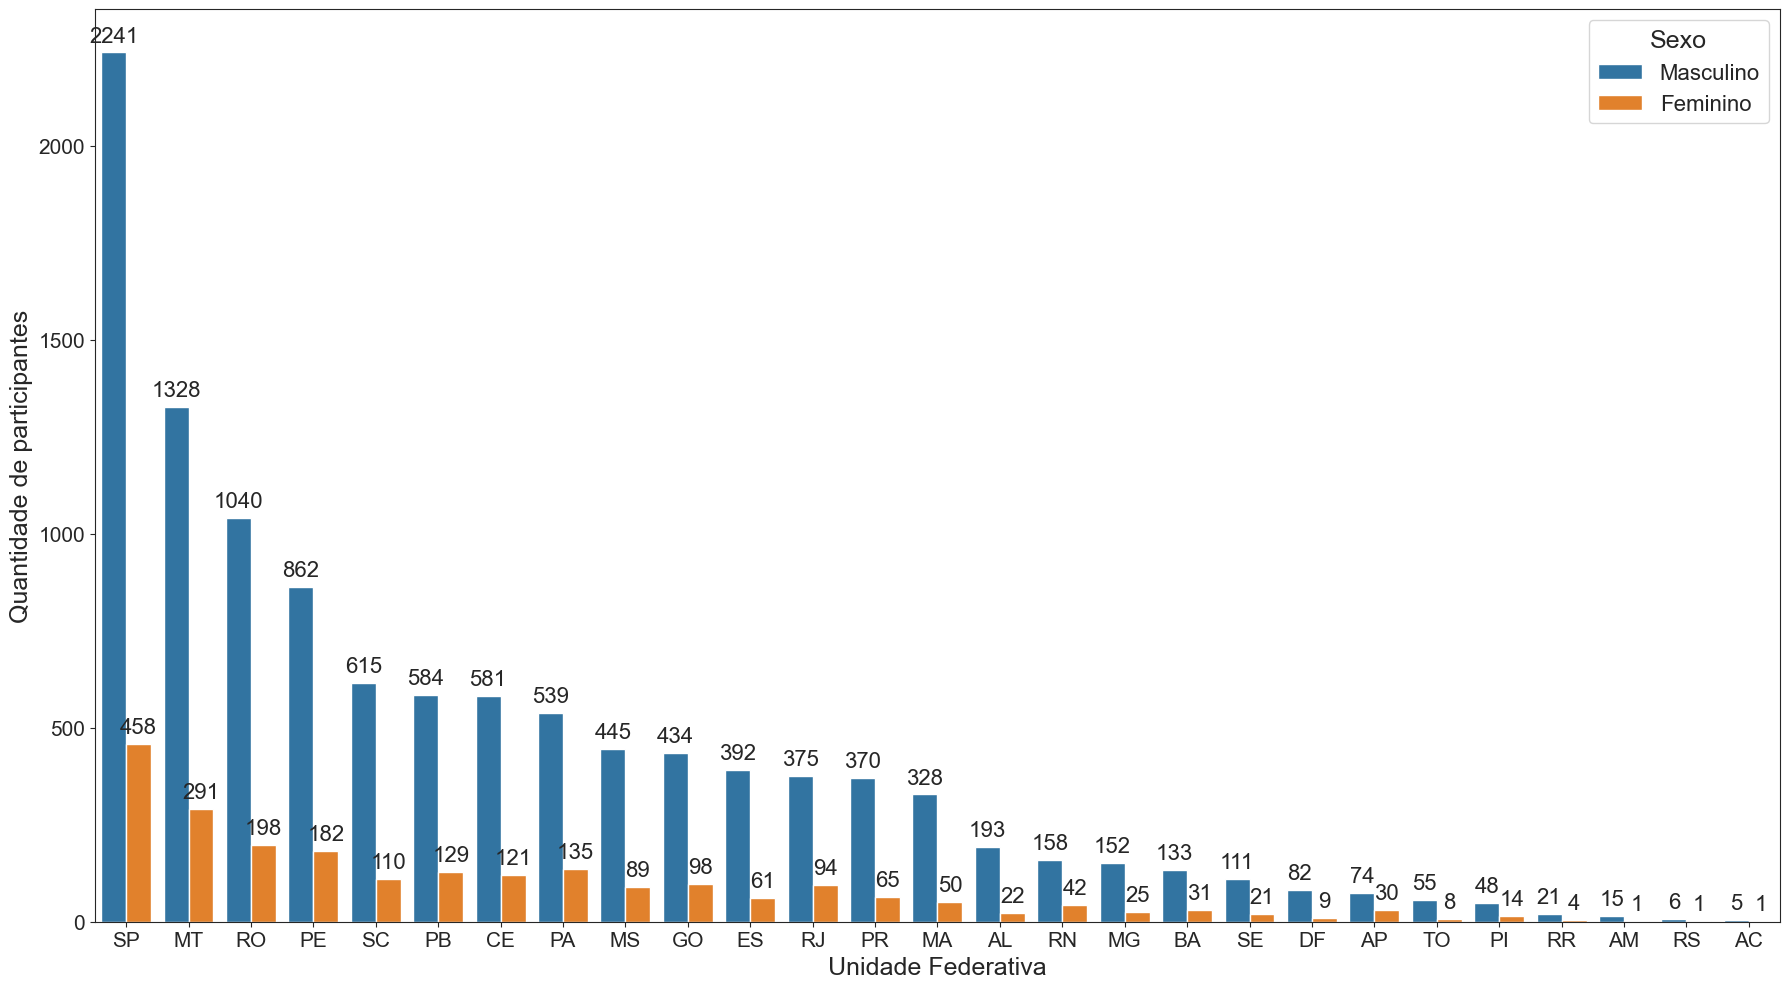

In [19]:
import math
plt.figure(figsize=(18,10))
sns.set_style(style='ticks')

ax = sns.barplot(data=por_sexo_estado.sort_values(['candidatos'], ascending=False),
                 y='candidatos',
                 x='ESTADO',
                 hue='SEXO',)

for p in ax.patches:
    if not math.isnan(p.get_height()):
        ax.annotate(int(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=16)

plt.xlabel('Unidade Federativa', fontsize=18)
plt.ylabel('Quantidade de participantes', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
legend = plt.legend(title='Sexo', fontsize=16)
legend.get_title().set_fontsize(18)
plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico
# plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
plt.show()


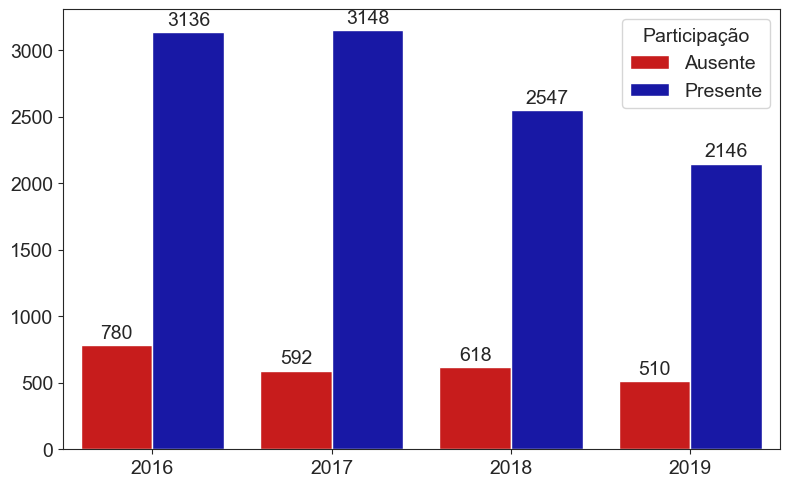

In [20]:
counts_presente = dados_poscomp.groupby(['PRESENTE', 'ANO']).size().reset_index(name='counts')

counts_presente['PRESENTE'] = counts_presente['PRESENTE'].replace({'N': 'Ausente', 'S': 'Presente'})

view.barplot_view(counts_presente, x='ANO', y='counts', hue='PRESENTE', 
                  paleta=["#E30000", "#0000BC"], title_legend='Participação')

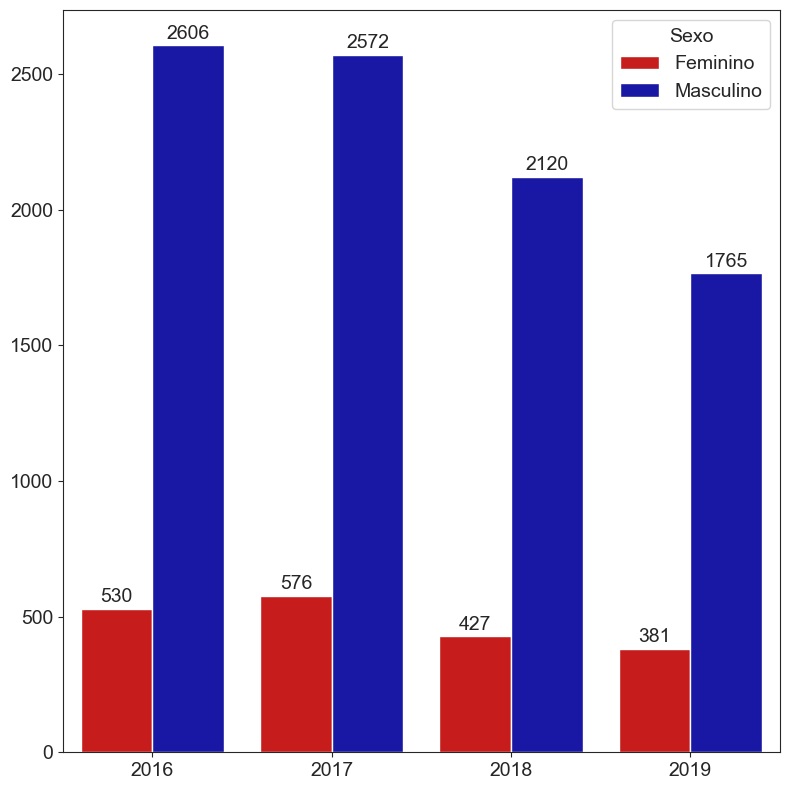

In [21]:
dados_presentes = dados_poscomp.query('PRESENTE == "S"')

counts_presente = dados_presentes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts_presente['SEXO'] = counts_presente['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

view.barplot_view(counts_presente, x='ANO', y='counts', hue='SEXO', paleta=["#E30000", "#0000BC"], title_legend='Sexo', figsize=(8,8))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


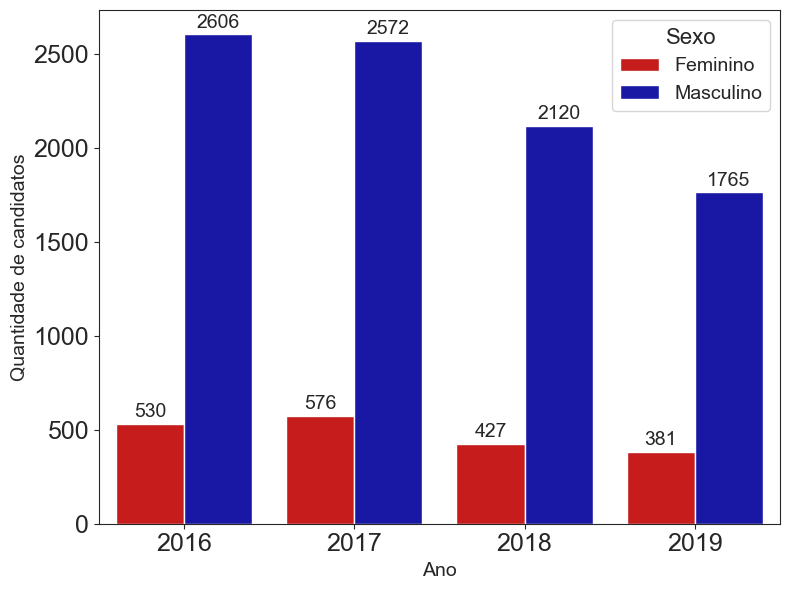

In [22]:
dados_presentes = dados_poscomp.query('PRESENTE == "S"')

counts_presente = dados_presentes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts_presente['SEXO'] = counts_presente['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

sns.set_style(style="ticks")

sns.set_palette(["#E30000", "#0000BC"])

plt.figure(figsize=(8, 6))

ax = sns.barplot(x="ANO", y="counts", hue="SEXO", data=counts_presente);

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=14, padding=2)

plt.xlabel('Ano', fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Quantidade de candidatos', fontsize=14)
legend = plt.legend(title='Sexo', fontsize=14)
legend.get_title().set_fontsize(16)
plt.tight_layout()
plt.savefig('imagens/grafico_porPresentes.eps',dpi = 600, bbox_inches='tight')
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


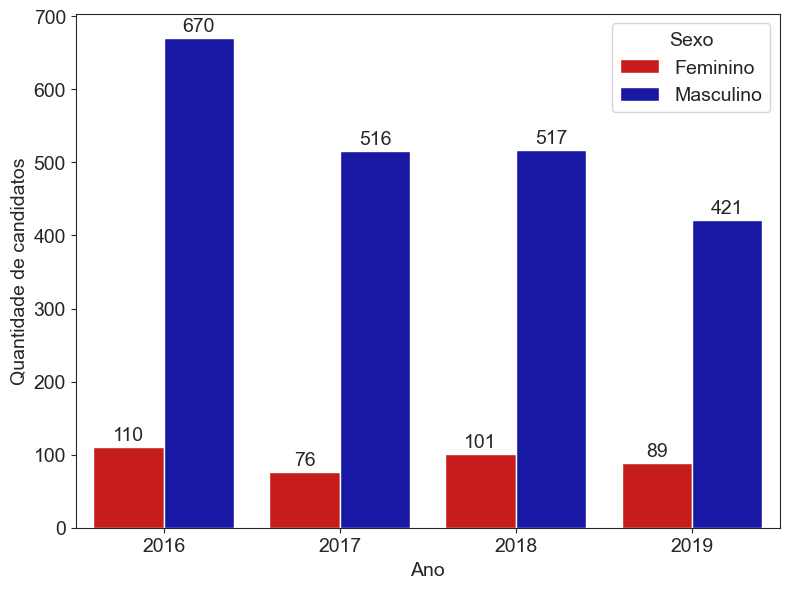

In [23]:
dados_faltantes = dados_poscomp.query('PRESENTE == "N"')

counts_faltantes = dados_faltantes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts_faltantes['SEXO'] = counts_faltantes['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

view.barplot_view(counts_faltantes, x='ANO', y='counts', hue='SEXO', paleta=["#E30000", "#0000BC"], title_legend='Sexo', figsize=(8,6),
                 ylabel='Quantidade de candidatos', xlabel='Ano', save_path='imagens/grafico_porFaltantes.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


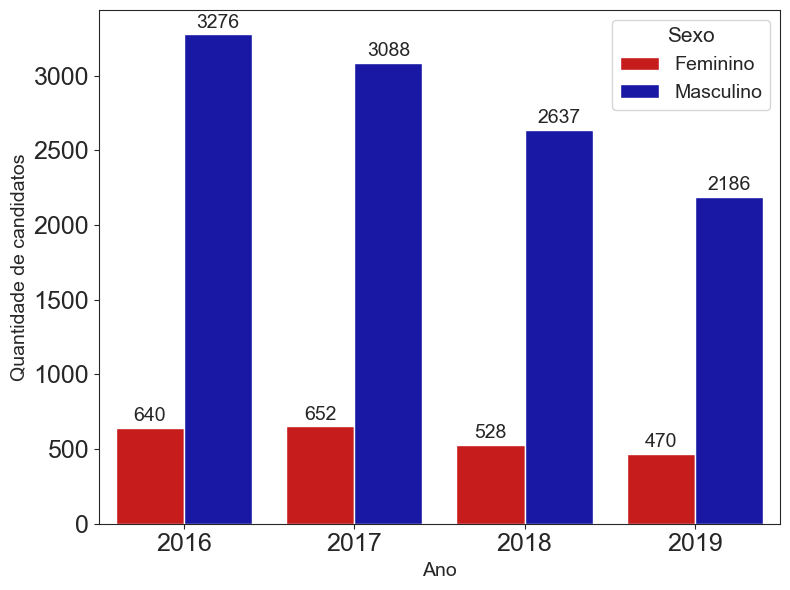

In [24]:
counts = dados_poscomp.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts['SEXO'] = counts['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

sns.set_style(style="ticks")

sns.set_palette(["#E30000", "#0000BC"])

plt.figure(figsize=(8, 6))

ax = sns.barplot(x="ANO", y="counts", hue="SEXO", data=counts)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=14, padding=2)

plt.xlabel('Ano', fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Quantidade de candidatos', fontsize=14)
legend = plt.legend(title='Sexo', fontsize=14)
legend.get_title().set_fontsize(15)
plt.tight_layout()
plt.savefig('imagens/grafico_porSexo.eps',dpi = 600, bbox_inches='tight')
plt.show()

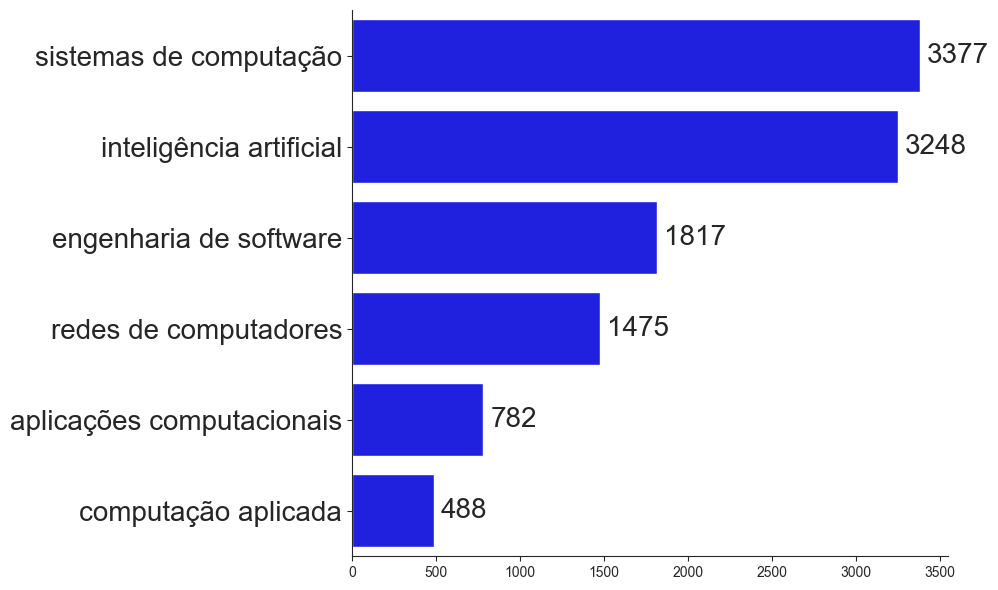

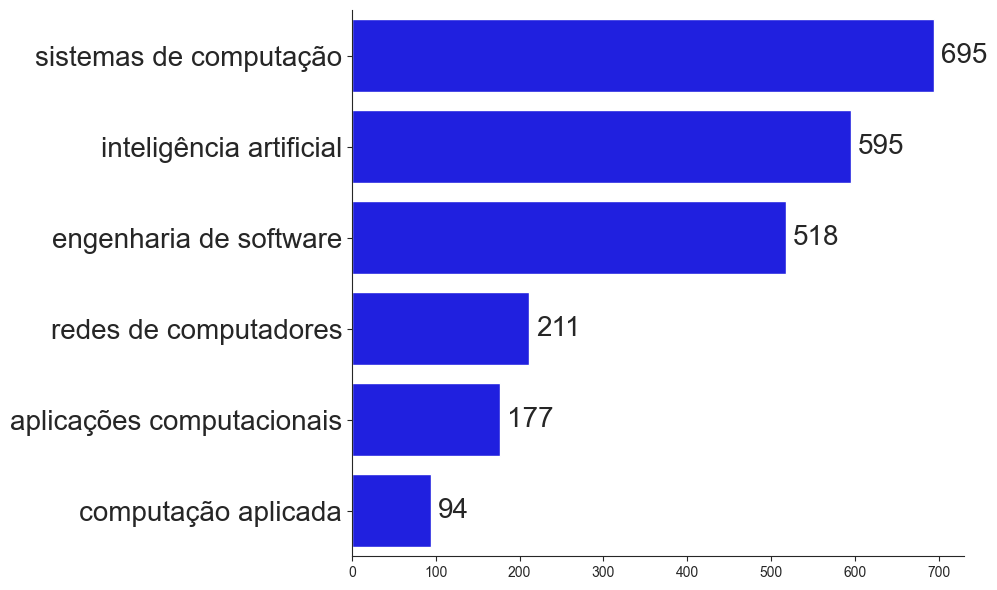

In [25]:
def plot_top_especialidades_por_sexo(data, sexo, top_n=10, save_path=None):
    genero_map = {1: 'Masculino', 0: 'Feminino'}
    
    data_sexo = data[data['SEXO'] == sexo]

    counts_esp = data_sexo['ESPECIALIDADE'].value_counts().reset_index()
    counts_esp.columns = ['ESPECIALIDADE', 'counts']

    top_especialidades = counts_esp.head(top_n)

    plt.figure(figsize=(10, 6))

    sns.barplot(data=top_especialidades, x='counts', y='ESPECIALIDADE', color='blue')

    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                           ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=20)

    
    plt.xlabel('')
    plt.yticks(fontsize=20)
    plt.ylabel('')
    plt.tight_layout() 
    
    # plt.title(f'Top {top_n} Especialidades - {genero_map.get(sexo, "Desconhecido")}')
    sns.despine()
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
        
    plt.show()


plot_top_especialidades_por_sexo(dados_poscomp, 1, top_n=10, save_path='imagens/espec_masculino.eps')
plot_top_especialidades_por_sexo(dados_poscomp, 0, top_n=10, save_path='imagens/espec_feminino.eps')


In [26]:
media_hist = dados_poscomp.query('PRESENTE == "S"')

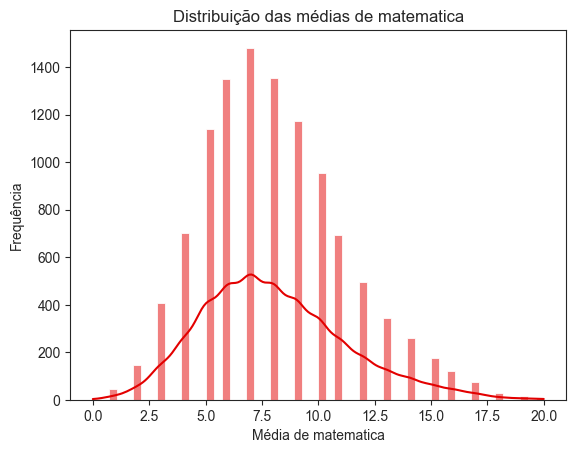

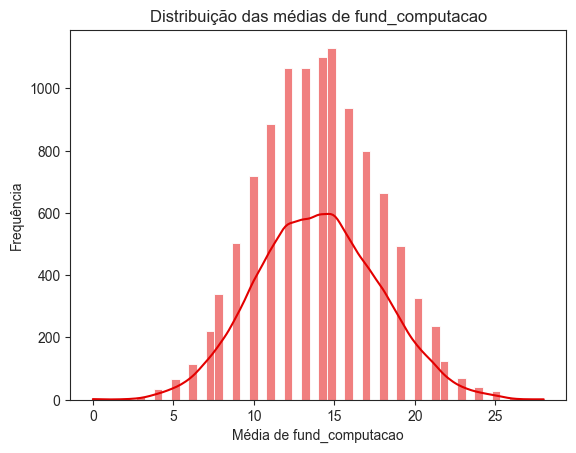

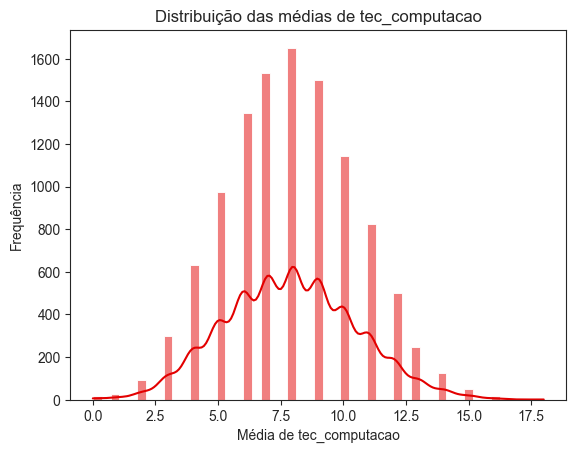

In [27]:
def plot_histogram(dataset, columns):
    for column in columns:
        sns.histplot(dataset[column], kde=True)
        plt.xlabel(f'Média de {column}')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das médias de {column}')
        plt.show()

columns = ['matematica', 'fund_computacao', 'tec_computacao']
plot_histogram(media_hist, columns)

In [28]:
dados_poscomp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13477 entries, 39401645886-1 to 51801366900-3
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SEXO                                             13477 non-null  int64  
 1   ESTADO                                           13477 non-null  int64  
 2   REGIAO                                           13477 non-null  int64  
 3   IDADE                                            13477 non-null  int64  
 4   ESPECIALIDADE                                    13477 non-null  object 
 5   PRESENTE                                         13477 non-null  object 
 6   CARGO                                            13477 non-null  int64  
 7   Matemática Discreta                              10977 non-null  float64
 8   Cálculo Diferencial e Integral                   10977 non-null  float64
 9   Álgebra Linea

In [29]:
# # Agrupar os dados por ano e cluster, e calcular a média para cada atributo
# data_grouped = dados_poscomp.groupby(['ANO', 'cluster']).mean()

# # Criar um gráfico de linha para cada atributo
# attributes = dados_poscomp.iloc[:,7:32]

# for attribute in attributes:
#     # Extrair os valores de desempenho médio para cada ano e cluster
#     values = data_grouped.loc[:, attribute]

#     # Criar um gráfico de linha para o atributo
#     plt.figure()
#     for cluster in range(num_clusters):
#         cluster_values = values.loc[:, cluster]
#         plt.plot(cluster_values.index, cluster_values.values, label=f'Cluster {cluster}')

#     plt.xlabel('Ano')
#     plt.ylabel('Desempenho Médio')
#     plt.title(f'Desempenho dos Candidatos por Ano - {attribute}')
#     plt.legend()
#     plt.show()

In [30]:
dados_poscomp = dados_poscomp.query('PRESENTE != "N"')
dados_poscomp.shape

(10977, 38)

In [31]:
media = dados_poscomp['total'].mean()
desvio_padrao = dados_poscomp['total'].std()
variancia = dados_poscomp['total'].var()

In [32]:
dados_poscomp['total'].max()

62.0

In [33]:
print(f'Média: {media}, Desvio Padrão: {desvio_padrao}, Variância: {variancia}')

Média: 29.879201967750753, Desvio Padrão: 7.5356285770420515, Variância: 56.78569805113281


In [34]:
# Limites do intervalo [15, 45]
limite_inferior = 15
limite_superior = 45

# Calcule a probabilidade no intervalo [15, 45]
probabilidade_intervalo = norm.cdf(limite_superior, loc=media, scale=desvio_padrao) - norm.cdf(limite_inferior, loc=media, scale=desvio_padrao)

print(f'A probabilidade no intervalo [{limite_inferior}, {limite_superior}] é: {probabilidade_intervalo:.4f}')

A probabilidade no intervalo [15, 45] é: 0.9534


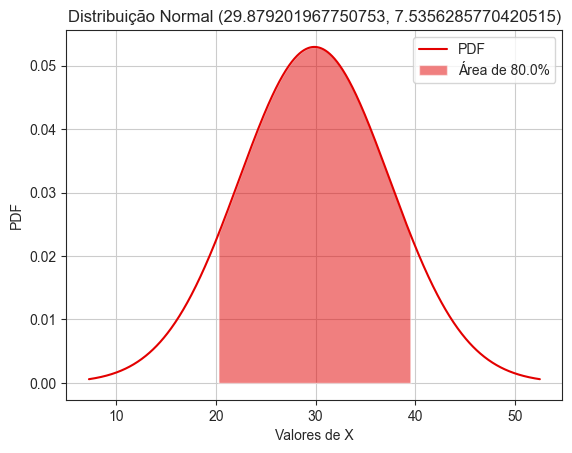

Intervalo de 80.0% de probabilidade: [20.22, 39.54]


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Probabilidade desejada
probabilidade = 0.80

# Encontre os valores de X correspondentes ao intervalo de probabilidade
limite_inferior, limite_superior = norm.interval(probabilidade, loc=media, scale=desvio_padrao)

# Valores para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
pdf = norm.pdf(x, loc=media, scale=desvio_padrao)

# Plote o gráfico da PDF
plt.plot(x, pdf, label='PDF')
plt.fill_between(x, pdf, where=(x >= limite_inferior) & (x <= limite_superior), alpha=0.5, label=f'Área de {probabilidade*100}%')
plt.xlabel('Valores de X')
plt.ylabel('PDF')
plt.title(f'Distribuição Normal ({media}, {desvio_padrao})')

# Exiba o gráfico
plt.legend()
plt.grid(True)
plt.show()

# Exiba o intervalo de valores de X correspondentes à probabilidade
print(f'Intervalo de {probabilidade*100}% de probabilidade: [{limite_inferior:.2f}, {limite_superior:.2f}]')


In [41]:
dados_poscomp = dados_poscomp[(dados_poscomp['total'] > 20) & (dados_poscomp['total'] < 40)]

In [42]:
dados_poscomp.shape

(8685, 35)

In [37]:
# dados_poscomp = dados_poscomp[(dados_poscomp['total'] > 20)]

In [38]:
dados_poscomp = dados_poscomp.drop(['PRESENTE','CARGO', 'ANO'], axis=1)

In [43]:
dados_poscomp.to_csv('dados/df_poscomp.csv', index=False)